<a href="https://colab.research.google.com/github/Amitwangoo50/Mumbai-apartment-price-pridiction/blob/main/Housing_in_Mumbai_model_selection%20and%20Outlier%20removing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%pip install category_encoders
from pandas.api.types import is_bool_dtype


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBRegressor
from pandas.api.types import is_integer_dtype

In [4]:

import io

df = pd.read_csv("/content/drive/MyDrive/csv_data/my_Mumbai.csv").rename(columns={'No. of Bedrooms': 'BHK'})

In [5]:
df.head()

,Price,Area,Location,BHK,Resale,SwimmingPool,LandscapedGardens,ClubHouse,CarParking,LiftAvailable
0,4850000,720,Kharghar,1,True,False,False,False,True,True
1,4500000,600,Kharghar,1,True,True,False,True,True,True
2,6700000,650,Kharghar,1,True,True,False,True,True,True
3,4500000,650,Kharghar,1,True,False,True,False,True,True
4,5000000,665,Kharghar,1,True,False,True,False,True,True


In [6]:
df["price_per_sq_ft"] = df["Price"] / df["Area"]

In [7]:
df1 = df.copy()

In [8]:
df1.Location.nunique()

413

In [9]:
df1

,Price,Area,Location,BHK,Resale,SwimmingPool,LandscapedGardens,ClubHouse,CarParking,LiftAvailable,price_per_sq_ft
0,4850000,720,Kharghar,1,True,False,False,False,True,True,6736.111111
1,4500000,600,Kharghar,1,True,True,False,True,True,True,7500.000000
2,6700000,650,Kharghar,1,True,True,False,True,True,True,10307.692308
3,4500000,650,Kharghar,1,True,False,True,False,True,True,6923.076923
4,5000000,665,Kharghar,1,True,False,True,False,True,True,7518.796992
...,...,...,...,...,...,...,...,...,...,...,...
7714,14500000,1180,Mira Road East,2,False,True,True,True,True,True,12288.135593
7715,14500000,530,Naigaon East,1,True,True,True,True,True,True,27358.490566
7716,4100000,700,Shirgaon,1,False,True,True,True,True,True,5857.142857
7717,2750000,995,Mira Road East,2,False,True,True,True,True,True,2763.819095


In [10]:
 # df.rename(columns={'Price': 'Price_in_crore'}, inplace=True)

In [11]:
df1 = df1[df["Price"] <= 38000000]
df1 = df1[df1["Area"] <= 2000]
df1.shape

(7021, 11)

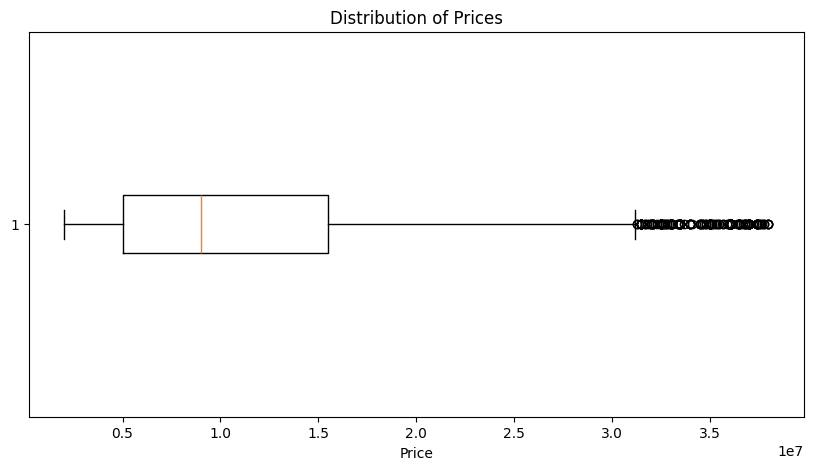

In [47]:
fig, ax = plt.subplots()

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (6,3)
#Build box plot in area_m2
ax.boxplot(df1["Price"], vert=False)
# Label x-axis
ax.set_xlabel("Price")
ax.set_title("Distribution of Prices");

Text(0.5, 1.0, 'Distribution of Apartment Prices')

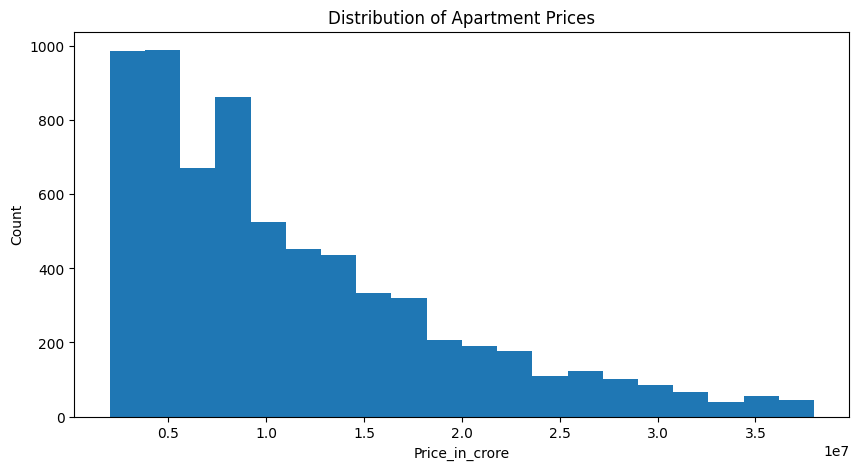

In [46]:
fig, ax = plt.subplots()

# Plot the histogram on the axes object
ax.hist(df1["Price"], bins=20)
# Label axes using the axes
ax.set_xlabel("Price_in_crore")
ax.set_ylabel("Count")


# Add title
ax.set_title("Distribution of Apartment Prices")

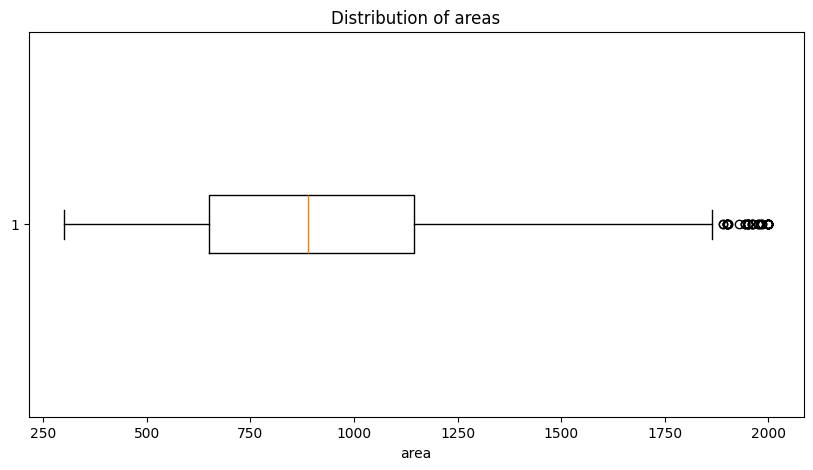

In [45]:
fig, ax = plt.subplots()

#Build box plot in area_m2
ax.boxplot(df1["Area"], vert=False)
# Label x-axis
ax.set_xlabel("area")
ax.set_title("Distribution of areas");

Text(0.5, 1.0, 'Price vs. Area')

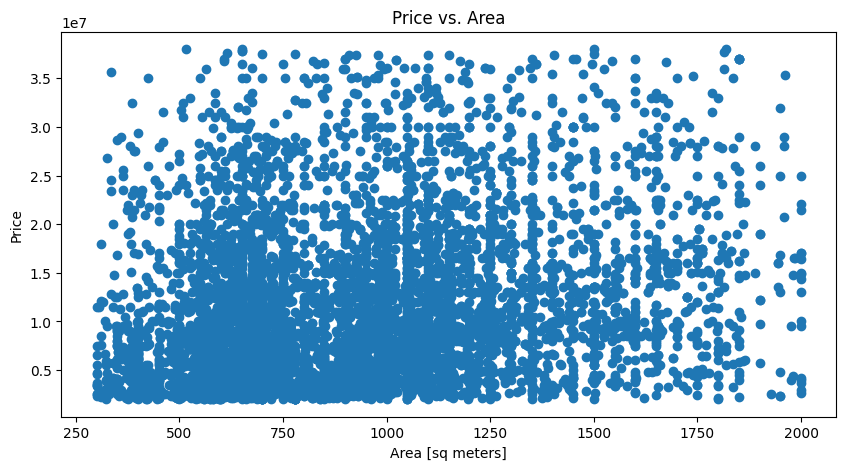

In [44]:
fig, ax = plt.subplots()

# Create the scatter plot on the axes object
ax.scatter(x=df1["Area"], y=df1["Price"])

# Label axes
ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price")

#  Add title
ax.set_title("Price vs. Area")

Text(0.5, 1.0, 'No. of HouseHolds')

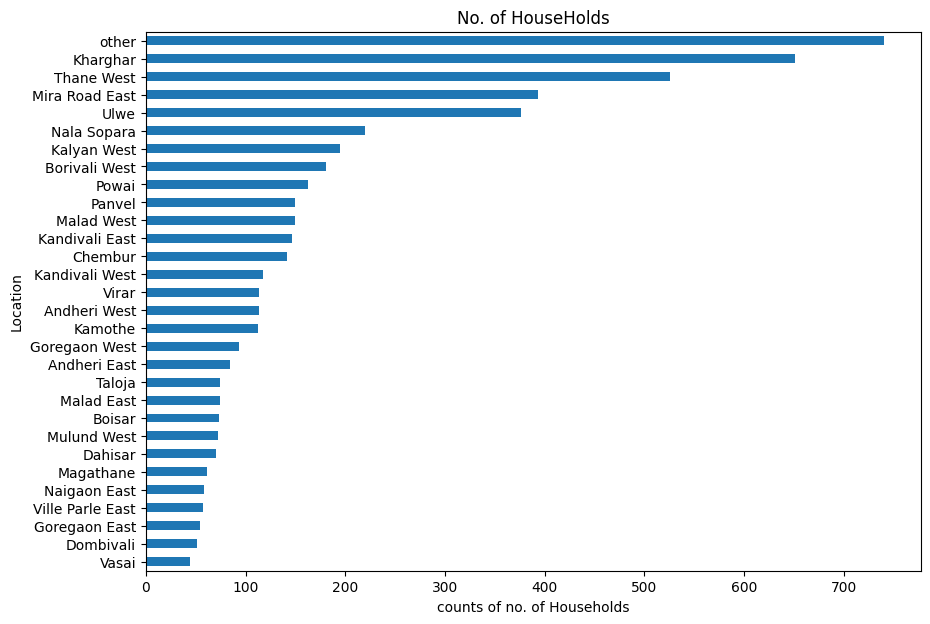

In [43]:
df1['Location'].value_counts()[:30].sort_values(ascending=1).plot(kind='barh', figsize=(10, 7))
plt.xlabel("counts of no. of Households")
plt.title("No. of HouseHolds")

In [17]:
df1 = df1[~(df1.Area/df1.BHK < 300)]
df1.shape

(6778, 11)

In [18]:
location_stats = df1.Location.value_counts().sort_values(ascending=True)

In [19]:
loc_less_than_11 = (location_stats[location_stats <= 9])
loc_less_than_11

,count
Location,
Padle Gaon,1
Byculla,1
Gandhar Nagar,1
Syndicate,1
Sector 10 Kamothe,1
...,...
taloja panchanand,9
Ghatkopar,9
kandivali,9


In [20]:
df1.Location = df1.Location.apply(lambda x: 'other' if x in loc_less_than_11.index else x)
df1.Location.nunique()

96

In [21]:
 # if want to drop the other values

  # df1[df1['Location'] != "other"].value_counts()
df1['Location'].value_counts()

,count
Location,
other,740
Kharghar,651
Thane West,526
Mira Road East,393
Ulwe,376
...,...
Vashi,11
Kurla West,11
Sector 10,10


In [22]:
Average_price_by_loc = df1.groupby("Location")["Price"].mean()
Average_price_by_loc

,Price
Location,
Airoli,8.779464e+06
Ambernath East,6.957437e+06
Ambernath West,1.044962e+07
Andheri,1.668846e+07
Andheri East,1.559386e+07
...,...
Wadala,2.087632e+07
Wadala East Wadala,1.812000e+07
matunga east,2.159286e+07


In [23]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sq_ft)
        st = np.std(subdf.price_per_sq_ft)
        reduced_df = subdf [(subdf.price_per_sq_ft>(m-st)) & (subdf.price_per_sq_ft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [24]:
df2 = remove_outliers(df1)
df2.shape

(5428, 11)

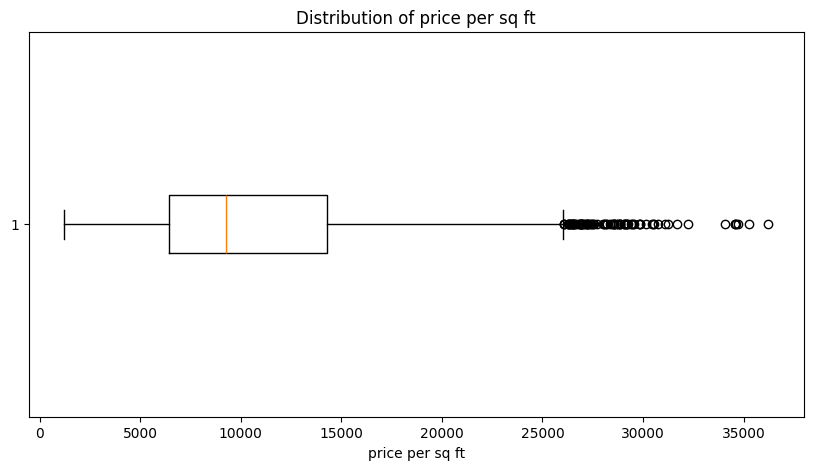

In [42]:
fig, ax = plt.subplots()

#Build box plot in area_m2
ax.boxplot(df2["price_per_sq_ft"], vert=False)
# Label x-axis
ax.set_xlabel("price per sq ft")
ax.set_title("Distribution of price per sq ft");

In [26]:
df2["Location"].value_counts()

,count
Location,
other,649
Kharghar,540
Thane West,415
Mira Road East,319
Ulwe,319
...,...
Bandra West,8
Khar West,8
Majiwada,8


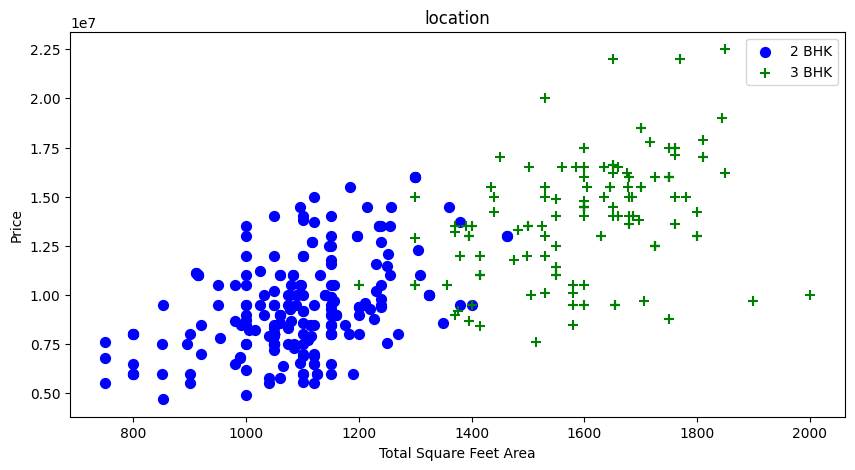

In [40]:

def plot_scatter_chart(df3, Location):
    bhk2 = df3[(df3.Location==Location) & (df3.BHK==2)]
    bhk3 = df3[(df3.Location==Location) & (df3.BHK==3)]
    plt.scatter(bhk2.Area,bhk2.Price, color='blue', label='2 BHK', s = 50)
    plt.scatter(bhk3.Area,bhk3.Price, marker='+', color='green', label='3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title("location")
    plt.legend()

plot_scatter_chart(df2, "Kharghar")

In [28]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sq_ft),
                'std': np.std(bhk_df.price_per_sq_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq_ft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [29]:
df3 = remove_bhk_outliers(df2)

Text(0, 0.5, 'Count')

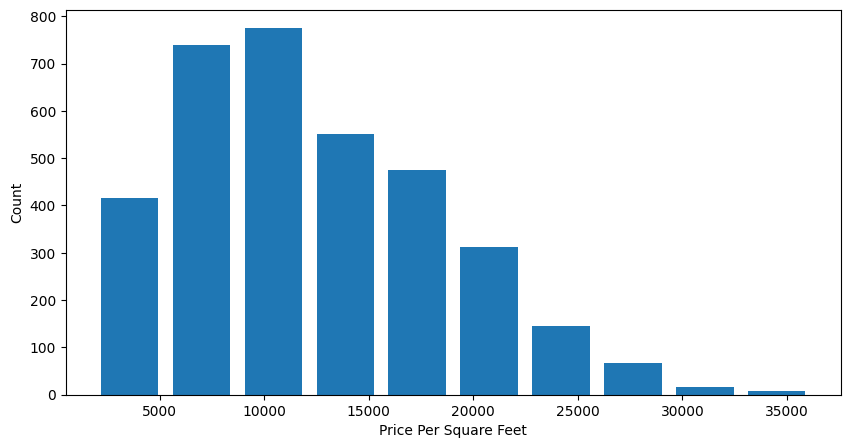

In [41]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,5)
plt.hist(remove_bhk_outliers(df2).price_per_sq_ft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
df3['Location']

,Location
0,Airoli
2,Airoli
3,Airoli
4,Airoli
5,Airoli
...,...
5421,other
5422,other
5424,other
5425,other


In [32]:
X = df3.drop(['Price', 'price_per_sq_ft'], axis=1)
y = df3.Price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop(['Price', 'price_per_sq_ft'], axis=1), df3.Price, test_size=0.2, random_state=42)

In [36]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1],
            }
        },
        'RandomForestRegressor': { # Changed the key name
            'model': RandomForestRegressor(), # Changed to RandomForestRegressor
            'params': {
                'n_estimators': range(10, 101, 25)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Identify categorical and numerical columns
    categorical_features = ['Location']
    numerical_features = [col for col in X.columns if is_integer_dtype(X[col])]
    boolean_features = [col for col in X.columns if is_bool_dtype(X[col])]


    # Create preprocessing pipelines for numerical and categorical features
    categorical_transformer = OneHotEncoder(use_cat_names=True, handle_unknown='ignore')


    for algo_name, config in algos.items():
        # Apply OneHotEncoder to categorical features
        X_encoded = categorical_transformer.fit_transform(X)

        # Concatenate with numerical and boolean features
        X_processed = pd.concat([X[numerical_features], X[boolean_features], X_encoded], axis=1)

        # Create a pipeline with the model
        pipeline = Pipeline(steps=[('regressor', config['model'])])

        # Adjust parameter grid keys for pipeline
        param_grid = {f'regressor__{key}': value for key, value in config['params'].items()}

        gs = GridSearchCV(pipeline, param_grid, cv=cv, return_train_score=False)
        gs.fit(X_processed,y)
        scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    return pd.DataFrame (scores, columns=['model', 'best_score', 'best_params'])

In [37]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.741059,{'regressor__fit_intercept': True}
1,Ridge,0.740429,{'regressor__alpha': 1}
2,RandomForestRegressor,0.720914,{'regressor__n_estimators': 85}


In [38]:
model = make_pipeline(OneHotEncoder(use_cat_names=True), Ridge(alpha=1))
model.fit(X, y)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Location'], use_cat_names=True)),
                ('ridge', Ridge(alpha=1))])

In [39]:
model.score(X_test, y_test)

0.7971537829645894